In [14]:
from scipy.optimize import linprog
import numpy as np
import matplotlib.pyplot as plt

In [15]:
                                    # x1 x2 x3 x4 x5 x6 x7
product_yields = np.array([[.50, .35, .20, .25, .50, .35, .00], # Ethylene
                            [.01, .15, .15, .18, .01, .15, .00], # Propylene
                            [.01, .02, .04, .05, .01, .02, .00], # Butadiene
                            [.01, .07, .25, .30, .01, .07, .00]]) # Gasoline

In [16]:
                            # Ethyl Propyl Butad Gasol
product_values = np.array([17.75, 13.79, 26.64, 9.93])
product_sales = product_values @ product_yields
print(product_sales)

[ 9.3786  9.5089  9.1666 11.2307  9.3786  9.5089  0.    ]


In [17]:
                            # x1 x2 x3 x4 x5 x6 x7
feed_costs = np.array([6.55, 9.73, 12.50, 10.14, 0, 0, 0])
cost_function = -(product_sales - feed_costs)
print(cost_function)

[-2.8286  0.2211  3.3334 -1.0907 -9.3786 -9.5089 -0.    ]


In [18]:
total_capacity_constraint = np.array([1.1, .9, .9, 1.0, 1.1, .9, 0])

ethylene_limit = np.array([.50, .35, .20, .25, .50, .35, 0])
propylene_limit = np.array([.01, .15, .15, .18, .01, .15, 0])

A_ub = np.row_stack([total_capacity_constraint, ethylene_limit, propylene_limit])
print(f"A_ub = {A_ub}")

b_ub = np.array([2e5, 5e4, 2e4])

A_ub = [[1.1  0.9  0.9  1.   1.1  0.9  0.  ]
 [0.5  0.35 0.2  0.25 0.5  0.35 0.  ]
 [0.01 0.15 0.15 0.18 0.01 0.15 0.  ]]


In [19]:
ethane_recycle = np.array([.40, .06, .04, .05, -.60, .06, 0])
propene_recycle = np.array([0, .10, .01, .01, 0, -.90, 0])

In [20]:
process_heat_required = np.array([8364, 5016, 3600, 4553, 8364, 5016, 0])

In [21]:
                            # x1 x2 x3 x4 x5 x6 x7
fuel_yields = np.array([[.07, .25, .10, .15, .07, .25, 0], # Methane
                        [0, 0, .21, .01, 0, 0, 0], # Fuel oil
                        [0, 0, 0, 0, 0, 0, 1]]) # Natural gas
                                # Metha Fuel NatGas
fuel_heating_values = np.array([21520, 18000, 21520])
heat_obtained = fuel_heating_values @ fuel_yields
print(heat_obtained)

[ 1506.4  5380.   5932.   3408.   1506.4  5380.  21520. ]


In [22]:
heat_constraint = heat_obtained - process_heat_required
print(f"heat_constraint = {heat_constraint}")
# Left-hand side of the constraints
A_eq = np.row_stack([ethane_recycle, propene_recycle, heat_constraint])
print(f"A_eq = {A_eq}")
# Right-hand side of the constraints
b_eq = np.array([0, 0, 2e6])

heat_constraint = [-6857.6   364.   2332.  -1145.  -6857.6   364.  21520. ]
A_eq = [[ 4.0000e-01  6.0000e-02  4.0000e-02  5.0000e-02 -6.0000e-01  6.0000e-02
   0.0000e+00]
 [ 0.0000e+00  1.0000e-01  1.0000e-02  1.0000e-02  0.0000e+00 -9.0000e-01
   0.0000e+00]
 [-6.8576e+03  3.6400e+02  2.3320e+03 -1.1450e+03 -6.8576e+03  3.6400e+02
   2.1520e+04]]


In [23]:
res = linprog(cost_function,
                A_ub = A_ub,
                b_ub = b_ub,
                A_eq = A_eq,
                b_eq = b_eq,
                )
optimal_product_flows = product_yields @ res.x
optimal_cost_base = -cost_function @ res.x
print(f"res: {res}")
print(f"optimal_product_flows: {optimal_product_flows}")
print(f"optimal_cost_base: {optimal_cost_base}")

res:         message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -544860.0
              x: [ 6.000e+04  0.000e+00  0.000e+00  0.000e+00  4.000e+04
                  -0.000e+00  3.196e+04]
            nit: 2
          lower:  residual: [ 6.000e+04  0.000e+00  0.000e+00  0.000e+00
                              4.000e+04 -0.000e+00  3.196e+04]
                 marginals: [ 0.000e+00  2.966e+00  5.183e+00  1.238e+00
                              0.000e+00  0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf        inf        inf
                                    inf        inf        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00
                              0.000e+00  0.000e+00  0.000e+00]
          eqlin:  residual: [ 0.000e+00  0.000e+00  0.000e+00]
                 marginals: [ 6.550e+00  6.764e+00 -0.000e+00]
        ineqlin:  residual: [ 9.000e+04  0.

In [24]:
# Saving the original ethylene flowrate capacity and the optimal ethylene␣,→flowrate in the base case
ethylene_constraint_base = b_ub[1]
print(f"ethylene_constraint_base: {ethylene_constraint_base}")
ethylene_flowrate_base = optimal_product_flows[0]
print(f"ethylene_flowrate_base: {ethylene_flowrate_base}")
# Copying the original upper bound array b_ub
b_ub_sweep = b_ub.copy()
print(f"b_ub_sweep: {b_ub_sweep}")
# Creating an array of maximum allowed ethylene concentrations to sweep through
ethylene_constraint_sweep = np.linspace(1, 3, 10)*ethylene_constraint_base 
print(f"ethylene_constraint_sweep: {ethylene_constraint_sweep}")
#␣,→Values ranging from 1 to 3 times the size of the original constraint
# Pre-allocating arrays to store the resulting values of the cost function and␣,→ethylene flowrate during the sweep
optimal_cost_sweep = np.zeros(ethylene_constraint_sweep.shape)
print(f"optimal_cost_sweep: {optimal_cost_sweep}")
ethylene_flowrate_sweep = np.zeros(ethylene_constraint_sweep.shape)
print(f"ethylene_flowrate_sweep: {ethylene_flowrate_sweep}")

ethylene_constraint_base: 50000.0
ethylene_flowrate_base: 50000.0
b_ub_sweep: [200000.  50000.  20000.]
ethylene_constraint_sweep: [ 50000.          61111.11111111  72222.22222222  83333.33333333
  94444.44444444 105555.55555556 116666.66666667 127777.77777778
 138888.88888889 150000.        ]
optimal_cost_sweep: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
ethylene_flowrate_sweep: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [25]:
# Performing the optimization for each value in our sweep array and saving them␣,→in our pre-allocated arrays
for i, value in enumerate(ethylene_constraint_sweep):
    b_ub_sweep[1] = value
    res = linprog(cost_function,
                    A_ub = A_ub,
                    b_ub = b_ub_sweep,
                    A_eq = A_eq,
                    b_eq = b_eq,
                    )
product_flowrates = product_yields @ res.x
print(f"product_flowrates: {product_flowrates}")
ethylene_flowrate_sweep[i] = product_flowrates[0]
print(f"ethylene_flowrate_sweep: {ethylene_flowrate_sweep}")
optimal_cost_sweep[i] = -cost_function @ res.x
print(f"optimal_cost_sweep: {optimal_cost_sweep}")

product_flowrates: [90909.09090909  1818.18181818  1818.18181818  1818.18181818]
ethylene_flowrate_sweep: [    0.             0.             0.             0.
     0.             0.             0.             0.
     0.         90909.09090909]
optimal_cost_sweep: [     0.              0.              0.              0.
      0.              0.              0.              0.
      0.         990654.54545455]


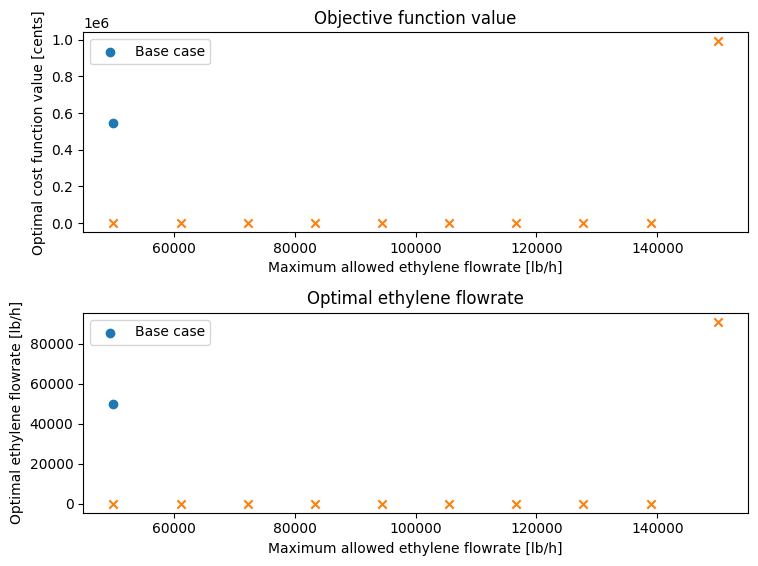

In [26]:
fig, ax = plt.subplots(nrows = 2, ncols = 1)
ax[0].scatter(ethylene_constraint_base, optimal_cost_base, label = "Base case")
ax[0].scatter(ethylene_constraint_sweep, optimal_cost_sweep, marker = 'x')
ax[0].set_xlabel('Maximum allowed ethylene flowrate [lb/h]')
ax[0].set_ylabel('Optimal cost function value [cents]')
ax[0].set_title('Objective function value')
ax[0].legend()
ax[1].scatter(ethylene_constraint_base, ethylene_flowrate_base, label = "Base case")
ax[1].scatter(ethylene_constraint_sweep, ethylene_flowrate_sweep, marker = 'x')
ax[1].set_xlabel('Maximum allowed ethylene flowrate [lb/h]')
ax[1].set_ylabel('Optimal ethylene flowrate [lb/h]')
ax[1].set_title('Optimal ethylene flowrate')
ax[1].legend()
fig.set_size_inches(1.2*6.4, 1.2*4.8) # Resizing the figure so that the y labels␣,→fit in the window
plt.tight_layout()